# 1. How interaction terms can be used in regression models

Interaction terms in regression models are used to capture the effect of two or more variables acting together on the dependent variable. By including interaction terms, you can account for situations where the relationship between one predictor and the outcome depends on the level of another predictor.

## 1.1. What are Interaction Terms?

An interaction term is a product of two or more variables included in a regression model. It allows the model to estimate how the effect of one predictor on the dependent variable changes as another predictor changes.

## 1.2. When to Use Interaction Terms

- **Non-Additive Effects:** When the combined effect of predictors is not simply the sum of their individual effects.

- **Moderation Analysis:** When you suspect that one variable moderates the effect of another on the outcome.

- **Curvilinear Relationships:** When the relationship between predictors and the response is not purely linear.

## 1.3 Example of an Interaction Term

Suppose you have a dataset with variables $X_1$ and $X_2$, and you want to model the outcome $Y$. The interaction term between $X_1$ and $X_2$ can be represented as $X_1 \times X_2$.

### Regression Equation with an Interaction Term

The regression equation with an interaction term looks like this:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 (X_1 \times X_2) + \epsilon
$$

Where:
- $Y$ is the dependent variable.
- $\beta_0$ is the intercept.
- $\beta_1, \beta_2, \beta_3$ are the coefficients for the variables.
- $X_1$ and $X_2$ are the independent variables.
- $\epsilon$ is the error term.

### Interpretation of the Interaction Term

- $\beta_3$ represents the change in the effect of $X_1$ on $Y$ for a one-unit change in $X_2$.
- The presence of an interaction term implies that the effect of one predictor on the outcome variable depends on the value of another predictor.

Interaction terms are useful in capturing the combined effects of variables in a regression model, particularly when the effect of one variable depends on the level of another variable.


## 1.4 Implementation in Python

Let's use an open-access dataset to illustrate how to implement interaction terms in a regression model.

We'll use the Auto MPG dataset from the seaborn library, which contains information about various cars, including their horsepower and weight, to predict miles per gallon (MPG).

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          7.26e-116
Time:                        02:39:51   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    63.55

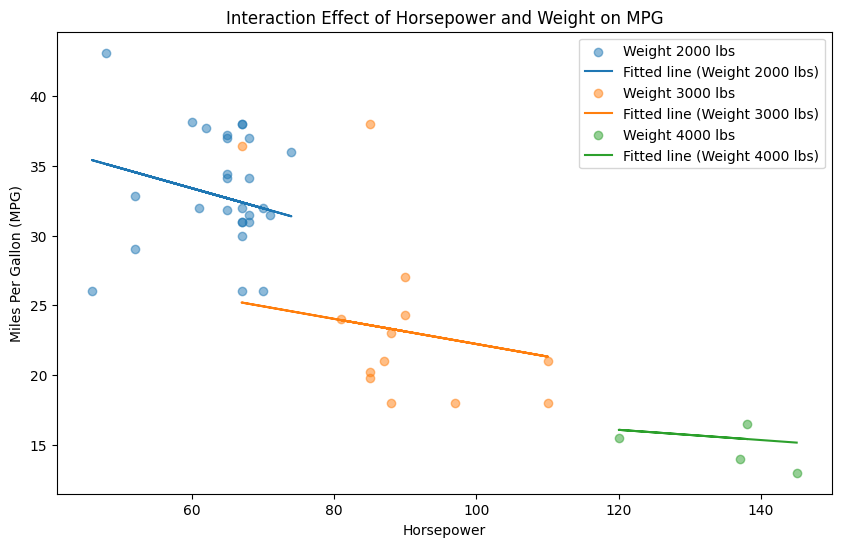

In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load the Auto MPG dataset
df = sns.load_dataset('mpg').dropna()

# Define the independent variables and add interaction term
df['hp_weight_interaction'] = df['horsepower'] * df['weight']

# Define the dependent and independent variables
X = df[['horsepower', 'weight', 'hp_weight_interaction']]
y = df['mpg']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

# Visualize the interaction effect
plt.figure(figsize=(10, 6))
for weight in [2000, 3000, 4000]:
    df_subset = df[df['weight'].round(-2) == weight]
    plt.scatter(df_subset['horsepower'], df_subset['mpg'], label=f'Weight {weight} lbs', alpha=0.5)

    # Create a DataFrame for prediction that includes the constant
    prediction_df = pd.DataFrame({
        'const': 1,  # Add constant column for intercept
        'horsepower': df_subset['horsepower'],
        'weight': np.full_like(df_subset['horsepower'], weight),
        'hp_weight_interaction': df_subset['horsepower'] * weight
    })

    # Predict the MPG based on horsepower for specific weight
    predicted_mpg = model.predict(prediction_df)

    plt.plot(df_subset['horsepower'], predicted_mpg, label=f'Fitted line (Weight {weight} lbs)')

plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.title('Interaction Effect of Horsepower and Weight on MPG')
plt.legend()
plt.show()
